In [47]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [48]:
# get the 4th root for embedding: https://developers.googleblog.com/2017/11/introducing-tensorflow-feature-columns.html

## The Preprocessed Data

In [49]:
# the combined forex and economic news data
df = pd.read_csv('fx_with_news.csv', header=[0,1], index_col=0)

In [50]:
df

c_eur                                                     \
                      mean       std bar_len bar_spearman bar_log_r   first_r   
ctime                                                                           
2016-01-03 22:00:00  1.088  0.000015    28.0     -0.73730 -0.000037  0.000030   
2016-01-03 22:05:00  1.087  0.000049   155.0     -0.18100 -0.000230  0.000081   
2016-01-03 22:10:00  1.087  0.000105   138.0     -0.46040 -0.000248  0.000202   
2016-01-03 22:15:00  1.087  0.000043   125.0      0.28220 -0.000028 -0.000007   
2016-01-03 22:20:00  1.087  0.000148   115.0     -0.04312 -0.000120 -0.000144   
...                    ...       ...     ...          ...       ...       ...   
2019-12-31 21:35:00  1.121  0.000036    62.0     -0.80100 -0.000080  0.000062   
2019-12-31 21:40:00  1.121  0.000028    41.0     -0.14160 -0.000009 -0.000027   
2019-12-31 21:45:00  1.121  0.000046   108.0      0.61300 -0.000018  0.000029   
2019-12-31 21:50:00  1.121  0.000046    97.0     -0.91260 -0.000143  0.000056   
2019-12-31 21:55:00  1.121  0.000131    91.0      0.07510  0.000294 -0.000033   

                                                                     ...  \
                        max_r     min_r    last_r bar_quantile_25_r  ...   
ctime                                                                ...   
2016-01-03 22:00:00  0.000030 -0.000016 -0.000007         -0.000009  ...   
2016-01-03 22:05:00  0.000081 -0.000149 -0.000149         -0.000029  ...   
2016-01-03 22:10:00  0.000202 -0.000147 -0.000046         -0.000064  ...   
2016-01-03 22:15:00  0.000057 -0.000108 -0.000035         -0.000007  ...   
2016-01-03 22:20:00  0.000224 -0.000264 -0.000264         -0.000126  ...   
...                       ...       ...       ...               ...  ...   
2019-12-31 21:35:00  0.000062 -0.000036 -0.000018         -0.000027  ...   
2019-12-31 21:40:00  0.000035 -0.000054 -0.000036         -0.000018  ...   
2019-12-31 21:45:00  0.000047 -0.000096  0.000011         -0.000024  ...   
2019-12-31 21:50:00  0.000092 -0.000122 -0.000086         -0.000015  ...   
2019-12-31 21:55:00  0.000261 -0.000122  0.000261         -0.000078  ...   

                                                             after_counter_ohe  \
                    _united states nondefense capital goods orders ex aircraft   
ctime                                                                            
2016-01-03 22:00:00                                           0.000000           
2016-01-03 22:05:00                                           0.000000           
2016-01-03 22:10:00                                           0.000000           
2016-01-03 22:15:00                                           0.000000           
2016-01-03 22:20:00                                           0.000000           
...                                                                ...           
2019-12-31 21:35:00                                           0.429514           
2019-12-31 21:40:00                                           0.429167           
2019-12-31 21:45:00                                           0.428819           
2019-12-31 21:50:00                                           0.428472           
2019-12-31 21:55:00                                           0.428125           

                                                     \
                    _united states nonfarm payrolls   
ctime                                                 
2016-01-03 22:00:00                             0.0   
2016-01-03 22:05:00                             0.0   
2016-01-03 22:10:00                             0.0   
2016-01-03 22:15:00                             0.0   
2016-01-03 22:20:00                             0.0   
...                                             ...   
2019-12-31 21:35:00                             0.0   
2019-12-31 21:40:00                             0.0   
2019-12-31 21:45:00                             0.0   
2019-12-31 2

In [51]:
# column hierarchy
for top in list(df.columns.get_level_values(0).unique()):
    print('----------------------------------')
    print('TOP COLUMN: ', top)
    print('SUBCOLUMNS: ', len(df[top].columns))
    print(list(df[top].columns))


----------------------------------
TOP COLUMN:  c_eur
SUBCOLUMNS:  11
['mean', 'std', 'bar_len', 'bar_spearman', 'bar_log_r', 'first_r', 'max_r', 'min_r', 'last_r', 'bar_quantile_25_r', 'bar_quantile_75_r']
----------------------------------
TOP COLUMN:  c_gbp
SUBCOLUMNS:  11
['mean', 'std', 'bar_len', 'bar_spearman', 'bar_log_r', 'first_r', 'max_r', 'min_r', 'last_r', 'bar_quantile_25_r', 'bar_quantile_75_r']
----------------------------------
TOP COLUMN:  c_jpy
SUBCOLUMNS:  11
['mean', 'std', 'bar_len', 'bar_spearman', 'bar_log_r', 'first_r', 'max_r', 'min_r', 'last_r', 'bar_quantile_25_r', 'bar_quantile_75_r']
----------------------------------
TOP COLUMN:  month
SUBCOLUMNS:  12
['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12']
----------------------------------
TOP COLUMN:  dow
SUBCOLUMNS:  6
['_0', '_1', '_2', '_3', '_4', '_6']
----------------------------------
TOP COLUMN:  hour
SUBCOLUMNS:  24
['_0', '_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9',

In [52]:
top_level = list(df.columns.get_level_values(0).unique())
top_level

['c_eur',
 'c_gbp',
 'c_jpy',
 'month',
 'dow',
 'hour',
 'event_cur',
 'event_exist',
 'actual_ohe',
 'surprise_ohe',
 'change_ohe',
 'after_counter_ohe']

## Processing for Model Input

In [53]:
# we will use 2016-2018 as training data, and 2019 as validation and test data
# problem: we have events that occure only in 2019
# we can't normalize/standardize/scale them based on 2016-2018 data
# we could move them to the '_(currency) event' columns, 
# but there is only a few, so here I will delete them

# have we all event type in 2016-2018 yers?
df['event_exist'].loc['2016':'2019'].any().all()

False

In [54]:
# find events occuring only in 2019
event_before_19 = df['event_exist'].loc['2016':'2019'].any()
event_only_19 = list(event_before_19[event_before_19==False].index)
event_only_19

['_european monetary union markit pmi composite',
 '_germany zew survey  economic sentiment',
 '_japan gross domestic product qoq',
 '_united states consumer price index ex food  energy mom',
 '_united states initial jobless claims 4week average',
 '_united states nondefense capital goods orders ex aircraft']

In [55]:
# drop events only occuring in 2019
df.drop(event_only_19, axis=1, level=1, inplace=True)

In [56]:
# have we all event type in 2016-2018 yers?
df['event_exist'].loc['2016':'2019'].any().all()
#ok

True

In [57]:
# label is unstandardized
# mean of a bar is less noisy than open or close, probably easier to recognize patterns
df_label = df.xs('mean', axis=1, level=1, drop_level=False)
df_label

,c_eur,c_gbp,c_jpy
,mean,mean,mean
ctime,,,
2016-01-03 22:00:00,1.088,1.474,0.8315
2016-01-03 22:05:00,1.087,1.475,0.8315
2016-01-03 22:10:00,1.087,1.475,0.8315
2016-01-03 22:15:00,1.087,1.475,0.8315
2016-01-03 22:20:00,1.087,1.475,0.8315
...,...,...,...
2019-12-31 21:35:00,1.121,1.325,0.9204
2019-12-31 21:40:00,1.121,1.325,0.9204


In [58]:
# we use only train and validation
# Standardizing and normalizing shifts the dataset, where +- sign can be important. Later the model will adjust this by the biases,
# but the information is lost. It could improve the performance if we make a new feature for + and - numbers, but here I don't want to make more features

In [59]:
c_list = ['c_eur', 'c_gbp', 'c_jpy']
# spearman doesn't need standardization
c_single_features = ['mean', 'std', 'bar_len']

# standardize features based on data up to 2019-01-01 00:00
for cur in c_list:
    for feature in c_single_features:
        df.loc[:,(cur, feature)] = (df[cur, feature] - df[cur, feature].loc['2016':'2019'].mean())/df[cur, feature].loc['2016':'2019'].std()

In [60]:
c_related_features = ['bar_log_r','first_r','max_r','min_r','last_r','bar_quantile_25_r','bar_quantile_75_r']
# these are related feature, we can think of them as one feature with subfeatures
# they are on similar scale 
# and the pairs on the other side of the mean (like max_r and min_r) are almost symmetric
# to preserve the signs we don't subtract the mean, only divide by the std
# this way we preserve their relative size
# *10000000 is only for easier comparison
print(df['c_eur'][c_related_features].abs().mean()*10000000)
print(df['c_eur'][c_related_features].mean()*10000000)

bar_log_r            1756.304442
first_r              1079.158825
max_r                1680.076339
min_r                1686.788351
last_r                960.659008
bar_quantile_25_r     647.481262
bar_quantile_75_r     647.172419
dtype: float64
bar_log_r               8.381825
first_r                -0.841197
max_r                1680.076339
min_r               -1686.788351
last_r                  7.541522
bar_quantile_25_r    -647.041006
bar_quantile_75_r     646.659303
dtype: float64


In [61]:
related_std = df[cur, 'bar_log_r'].loc['2016':'2019'].std()

for cur in c_list:
    for feature in c_related_features:
        df.loc[:,(cur, feature)] = (df[cur, feature])/related_std

In [62]:
# ok, these features remained on similar scale, but the other features as well
print(df['c_eur'][c_related_features].abs().mean())
print(df['c_eur'][c_related_features].mean())

bar_log_r            0.493106
first_r              0.302988
max_r                0.471704
min_r                0.473588
last_r               0.269718
bar_quantile_25_r    0.181789
bar_quantile_75_r    0.181702
dtype: float64
bar_log_r            0.002353
first_r             -0.000236
max_r                0.471704
min_r               -0.473588
last_r               0.002117
bar_quantile_25_r   -0.181665
bar_quantile_75_r    0.181558
dtype: float64


In [63]:
# 'event_cur' is on similar scale, we don't touch (normalization would be better than standardization)
df['event_cur'].max()

_EUR    2.000000
_GBP    2.828427
_JPY    1.732051
_USD    3.000000
dtype: float64

In [64]:
# should consider every event type alone, but there are 76 event types, so just normalize
df['actual_ohe'] = (df['actual_ohe'] - df['actual_ohe'].loc['2016':'2019'].min())/(df['actual_ohe'].loc['2016':'2019'].max() - df['actual_ohe'].loc['2016':'2019'].min())
# where max-min == 0 we get NaN, fill with 0
df['actual_ohe'] = df['actual_ohe'].fillna(0.0)

In [65]:
# dividing with the max of absolute values keeps the signs
df['surprise_ohe'] = df['surprise_ohe']/df['surprise_ohe'].loc['2016':'2019'].abs().max()
df['surprise_ohe'] = df['surprise_ohe'].fillna(0.0)

df['change_ohe'] = df['change_ohe']/df['change_ohe'].loc['2016':'2019'].abs().max()
df['change_ohe'] = df['change_ohe'].fillna(0.0)

df['after_counter_ohe'] = df['after_counter_ohe']/df['after_counter_ohe'].loc['2016':'2019'].abs().max()
df['after_counter_ohe'] = df['after_counter_ohe'].fillna(0.0)

In [66]:
df_label = df_label.astype('float16')
df = df.astype('float16')
df_label

,c_eur,c_gbp,c_jpy
,mean,mean,mean
ctime,,,
2016-01-03 22:00:00,1.087891,1.473633,0.831543
2016-01-03 22:05:00,1.086914,1.474609,0.831543
2016-01-03 22:10:00,1.086914,1.474609,0.831543
2016-01-03 22:15:00,1.086914,1.474609,0.831543
2016-01-03 22:20:00,1.086914,1.474609,0.831543
...,...,...,...
2019-12-31 21:35:00,1.121094,1.325195,0.920410
2019-12-31 21:40:00,1.121094,1.325195,0.920410


## The Datasets

In [67]:
train_size=864
target_size=85 # this is defined by the network, and not the network is defined by this
shift=1
batch_size=64

In [68]:
# label data begins from the end of the first train data

def ds_input(df, concat_tops, feature_to_last):
    nx = df.to_numpy()
    if (isinstance(df.columns, pd.core.index.MultiIndex) and concat_tops==False):
        top_level_nb = len(df.columns.get_level_values(0).unique())
        sub_level_nb = len(df.columns.get_level_values(1).unique())
        nx = nx.reshape(-1,top_level_nb,sub_level_nb)
        if feature_to_last == True:
            nx = np.moveaxis(nx, [0,1,2], [0,2,1])
        nx = np.squeeze(nx)
    return nx

def make_ds(batch_size, time_steps, shift, skip_steps, df, concat_tops=False, feature_to_last=True):
    nx = ds_input(df, concat_tops, feature_to_last)
    ds = tf.data.Dataset.from_tensor_slices(nx[skip_steps:])
    ds = ds.window(time_steps, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda window: window.batch(time_steps))
    return ds.batch(batch_size, drop_remainder=True)

In [69]:
ds_label = make_ds(batch_size=batch_size,
                   time_steps=target_size, 
                   shift=shift, 
                   skip_steps=train_size, 
                   df=df_label)

In [70]:
# ['c_eur', 'c_gbp', 'c_jpy', 'month', 'dow', 'hour', 'event_cur', 'event_exist', 'actual_ohe', 'surprise_ohe', 'change_ohe', 'after_counter_ohe']
input_dataset_args = {'batch_size':batch_size,
                      'time_steps':train_size,
                      'shift':shift, 
                      'skip_steps':0}

ds_bars_feat_end = make_ds(**input_dataset_args, df=df[['c_eur', 'c_gbp', 'c_jpy']])
ds_bars_curr_end = make_ds(**input_dataset_args, df=df[['c_eur', 'c_gbp', 'c_jpy']], concat_tops=False, feature_to_last=False)
ds_bars_simple = make_ds(**input_dataset_args, df=df[['c_eur', 'c_gbp', 'c_jpy']], concat_tops=True)
ds_event_ohe = make_ds(**input_dataset_args, df=df[['actual_ohe','surprise_ohe','change_ohe','after_counter_ohe']], concat_tops=True) # for simplicity
ds_event_exist = make_ds(**input_dataset_args, df=df['event_exist'])
ds_time_cur = make_ds(**input_dataset_args, df=df[['month', 'dow', 'hour', 'event_cur']], concat_tops=True)

In [71]:
ds_input_full = make_ds(**input_dataset_args, df=df[['c_eur', 'c_gbp', 'c_jpy', 
                                                     'month', 'dow', 'hour', 
                                                     'event_cur',
                                                     'event_exist','actual_ohe','surprise_ohe','change_ohe','after_counter_ohe']], concat_tops=True)

In [72]:
ds_event_future = make_ds(  batch_size=batch_size,
                            time_steps=target_size, 
                            shift=shift, 
                            skip_steps=train_size, 
                            df=df['event_exist'])
ds_time_curr_future = make_ds(  batch_size=batch_size,
                            time_steps=target_size, 
                            shift=shift, 
                            skip_steps=train_size, 
                            df=df[['month', 'dow', 'hour', 'event_cur']], concat_tops=True)

In [73]:
print('ds_label ',ds_label)

print('ds_bars_feat_end ',ds_bars_feat_end) # not used
print('ds_bars_curr_end ',ds_bars_curr_end) # not used
print('ds_bars_simple ',ds_bars_simple)
print('ds_event_ohe ', ds_event_ohe) 
# more than one ocasion per number => no entity embedding
print('ds_time_cur', ds_time_cur) 
print('ds_event_exist ', ds_event_exist)
# 
print('ds_event_future ', ds_event_future)
print('ds_time_curr_future ', ds_time_curr_future)
#
print('ds_input_full ', ds_input_full)

ds_label  <BatchDataset shapes: (64, None, 3), types: tf.float16>
ds_bars_feat_end  <BatchDataset shapes: (64, None, 11, 3), types: tf.float16>
ds_bars_curr_end  <BatchDataset shapes: (64, None, 3, 11), types: tf.float16>
ds_bars_simple  <BatchDataset shapes: (64, None, 33), types: tf.float16>
ds_event_ohe  <BatchDataset shapes: (64, None, 280), types: tf.float16>
ds_time_cur <BatchDataset shapes: (64, None, 46), types: tf.float16>
ds_event_exist  <BatchDataset shapes: (64, None, 70), types: tf.float16>
ds_event_future  <BatchDataset shapes: (64, None, 70), types: tf.float16>
ds_time_curr_future  <BatchDataset shapes: (64, None, 46), types: tf.float16>
ds_input_full  <BatchDataset shapes: (64, None, 429), types: tf.float16>


## Building the Model

In [74]:
class GatedActivationUnit(keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate

In [75]:
def wavenet_residual_block(inputs, n_filters, dilation_rate):
    z = keras.layers.Conv1D(2 * n_filters, kernel_size=2, padding="causal",
                            dilation_rate=dilation_rate)(inputs)
    z = GatedActivationUnit()(z)
    z = keras.layers.Conv1D(n_filters, kernel_size=1)(z)
    return keras.layers.Add()([z, inputs]), z

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
# inputs
input_c1 = keras.layers.Input(shape=[train_size, 11, 3])
input_c2 = keras.layers.Input(shape=[train_size, 3, 11])
input_simple_c = keras.layers.Input(shape=[train_size, 33])
input_ohe = keras.layers.Input(shape=[train_size, 280])
input_time_cur = keras.layers.Input(shape=[train_size, 46])
input_event_exist = keras.layers.Input(shape=[train_size, 70])


input_f_time_cur = keras.layers.Input(shape=[target_size, 46])
input_f_event_exist = keras.layers.Input(shape=[target_size, 70])

In [78]:
# not used
def curr_cross_input_model(input1, input2):
    z1 = keras.layers.Conv2D(2*3, kernel_size=1, padding="valid")(input1)
    z1 = keras.layers.Reshape([train_size,66])(z1)
    
    z2 = keras.layers.Conv2D(2*11, kernel_size=1, padding="valid")(input2)
    z2 = keras.layers.Reshape([train_size,66])(z2)
    
    out = keras.layers.Concatenate(axis=-1)([z1, z2])
    return keras.models.Model(inputs=[input1, input2], outputs=[out])

model_cur_cross_in = curr_cross_input_model(input_c1, input_c2)
model_cur_cross_in._name = 'model_cur_cross_in'

model_cur_cross_in.summary()

Model: "model_cur_cross_in"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 864, 11, 3)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 864, 3, 11)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 864, 11, 6)   24          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 864, 3, 22)   264         input_2[0][0]                    
_________________________________________________________________________________

In [79]:
def event_exist_model(inputs):
    out = keras.layers.Conv1D(10, kernel_size=1, strides=1, padding='valid')(inputs)
    return keras.models.Model(inputs=[inputs], outputs=[out])

model_event_exist = event_exist_model(input_event_exist)
model_event_exist._name = 'model_event_exist'

model_event_exist.summary()

Model: "model_event_exist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 864, 70)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 864, 10)           710       
Total params: 710
Trainable params: 710
Non-trainable params: 0
_________________________________________________________________


In [80]:
def time_cur_model(inputs):
    print(inputs.shape)
    out = keras.layers.Conv1D(6, kernel_size=1, strides=1, padding='valid')(inputs)
    return keras.models.Model(inputs=[inputs], outputs=[out])

model_time_cur = time_cur_model(input_time_cur)
model_time_cur._name = 'model_time_cur'

model_time_cur.summary()

(None, 864, 46)
Model: "model_time_cur"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 864, 46)]         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 864, 6)            282       
Total params: 282
Trainable params: 282
Non-trainable params: 0
_________________________________________________________________


In [81]:
def event_ohe_input_model(inputs):
    out = keras.layers.Conv1D(16, kernel_size=1, strides=1, padding='valid')(inputs)
    return keras.models.Model(inputs=[inputs], outputs=[out])

model_event_ohe = event_ohe_input_model(input_ohe)
model_event_ohe._name = 'model_event_ohe'

model_event_ohe.summary()

Model: "model_event_ohe"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 864, 280)]        0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 864, 16)           4496      
Total params: 4,496
Trainable params: 4,496
Non-trainable params: 0
_________________________________________________________________


In [82]:
def wavenet_model(n_layers_per_block, n_blocks, n_filters, n_outputs):
    # n_layers_per_block = 10 in the paper
    # n_blocks = 3 in the paper
    # n_filters = 128 in the paper
    # n_outputs = 256 in the paper
    
    inputs = keras.layers.Input(shape=[train_size, 65]) # 164 with cross model
    z = keras.layers.Conv1D(n_filters, kernel_size=2, padding="causal")(inputs)
    skip_to_last = []
    for dilation_rate in [2**i for i in range(n_layers_per_block)] * n_blocks:
        z, skip = wavenet_residual_block(z, n_filters, dilation_rate)
        skip_to_last.append(skip)
    z = keras.activations.relu(keras.layers.Add()(skip_to_last))
    z = keras.layers.Conv1D(n_filters, kernel_size=1, activation="relu")(z)
    Y_proba = keras.layers.Conv1D(n_outputs, kernel_size=1, activation="softmax")(z)
    return keras.models.Model(inputs=[inputs], outputs=[Y_proba])

model_wn = wavenet_model(n_layers_per_block=3, n_blocks=2, n_filters=32, n_outputs=3)
# (fast test) #  model_wn = wavenet_model(n_layers_per_block=2, n_blocks=1, n_filters=1, n_outputs=3)
model_wn._name = 'model_wavenet'

#keras.utils.plot_model(model, show_shapes=True)
model_wn.summary()

Model: "model_wavenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 864, 65)]    0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 864, 32)      4192        input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 864, 64)      4160        conv1d_3[0][0]                   
__________________________________________________________________________________________________
gated_activation_unit (GatedAct (None, 864, 32)      0           conv1d_4[0][0]                   
______________________________________________________________________________________

In [83]:
def head_model():
    inputs = keras.layers.Input(shape=[train_size, 3])
    z = keras.layers.AveragePooling1D(pool_size=5, strides=5, padding='valid', data_format='channels_last')(inputs)
    out = keras.layers.Conv1D(3, kernel_size=3, strides=2, padding='valid')(z)
    return keras.models.Model(inputs=[inputs], outputs=[out])

model_head = head_model()
model_head._name = 'model_head'

model_head.summary()

Model: "model_head"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 864, 3)]          0         
_________________________________________________________________
average_pooling1d (AveragePo (None, 172, 3)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 85, 3)             30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [84]:
ohe = model_event_ohe(input_ohe)
time_cur = model_time_cur(input_time_cur)
event_ex = model_event_exist(input_event_exist)
inputs = keras.layers.Concatenate(axis=-1)([input_simple_c, ohe, time_cur, event_ex])
wave = model_wn(inputs)
out_head = model_head(wave)

time_cur_f = model_time_cur(input_f_time_cur)
event_ex_f = model_event_exist(input_f_event_exist)

input_f = keras.layers.Concatenate(axis=-1)([out_head, time_cur_f, event_ex_f])
out_f = keras.layers.Conv1D(3, kernel_size=1, strides=1, padding='valid')(input_f)

model_sum = keras.models.Model(inputs=[input_simple_c, input_ohe, input_time_cur, input_event_exist, input_f_time_cur, input_f_event_exist], outputs=[out_f])

model_sum.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 864, 280)]   0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 864, 46)]    0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 864, 70)]    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 864, 33)]    0                                            
____________________________________________________________________________________________

## Learning Rate

In [85]:
def learning_rate_finder(model, train_set):  
    """
    Goes trough learning rates and gives back the history object
    to find optimal learning rate.
    """
    # check learning rates to find the best
    lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-7 * 10**(epoch / 9))
    optimizer = keras.optimizers.Adam(lr=1e-7)
    model.compile(loss=keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])
    # get history to find the best learning rate
    return model.fit(train_set, epochs=60, callbacks=[lr_schedule])

In [86]:
def lr_loss_chart(finder_history, xmin, xmax, ymin, ymax):  
    # plot the learning rate / loss chart
    # the best learning rates are around the lowest smooth part of the curve
    plt.semilogx(finder_history.history["lr"], finder_history.history["loss"])
    plt.axis([xmin, xmax, ymin, ymax])

Epoch 1/60
64/64 [==============================] - 122s 2s/step - loss: 0.6548 - mae: 1.1478
Epoch 2/60
64/64 [==============================] - 116s 2s/step - loss: 0.6559 - mae: 1.1485
Epoch 3/60
64/64 [==============================] - 117s 2s/step - loss: 0.6527 - mae: 1.1455
Epoch 4/60
64/64 [==============================] - 118s 2s/step - loss: 0.6510 - mae: 1.1433
Epoch 5/60
64/64 [==============================] - 118s 2s/step - loss: 0.6576 - mae: 1.1509
Epoch 6/60
64/64 [==============================] - 117s 2s/step - loss: 0.6588 - mae: 1.1523
Epoch 7/60
64/64 [==============================] - 117s 2s/step - loss: 0.6565 - mae: 1.1488
Epoch 8/60
64/64 [==============================] - 116s 2s/step - loss: 0.6564 - mae: 1.1495
Epoch 9/60
64/64 [==============================] - 119s 2s/step - loss: 0.6562 - mae: 1.1489
Epoch 10/60
64/64 [==============================] - 116s 2s/step - loss: 0.6514 - mae: 1.1434
Epoch 11/60
64/64 [==============================] - 117s 2

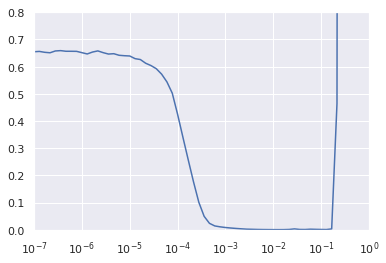

In [87]:
ds_worker_test = tf.data.Dataset.zip(((ds_bars_simple, ds_event_ohe, ds_time_cur, ds_event_exist, ds_time_curr_future, ds_event_future), 
                                 ds_label)).shuffle(64).prefetch(tf.data.experimental.AUTOTUNE).take(64)
lr_loss_chart(learning_rate_finder(model_sum, train_set=ds_worker_test), 1e-7, 1, 0, 0.8)

In [57]:
ds_worker = tf.data.Dataset.zip(((ds_bars_simple, ds_event_ohe, ds_time_cur, ds_event_exist, ds_time_curr_future, ds_event_future), 
                                 ds_label)).prefetch(tf.data.experimental.AUTOTUNE)
model_sum.compile(loss=keras.losses.Huber(), optimizer="adam", metrics=["mae"])
history = model_sum.fit(ds_worker, epochs=2)

In [32]:
ds_worker = tf.data.Dataset.zip((ds_input_full, ds_label))

In [33]:
ds_worker

<ZipDataset shapes: ((None, None, 429), (None, None, 3)), types: (tf.float64, tf.float64)>

In [42]:
def learning_rate_finder(model, train_set):  
    """
    Goes trough learning rates and gives back the history object
    to find optimal learning rate.
    """
    # check learning rates to find the best
    lr_schedule = keras.callbacks.LearningRateScheduler(
      lambda epoch: 1e-8 * 10**(epoch / 20))
    optimizer = keras.optimizers.SGD(lr=1e-8, momentum=0.9)
    model.compile(loss=keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])
    # get history to find the best learning rate
    return model.fit(train_set, epochs=100, callbacks=[lr_schedule])

In [43]:
def lr_loss_chart(finder_history, xmin, xmax, ymin, ymax):  
    # plot the learning rate / loss chart
    # the best learning rates are around the lowest smooth part of the curve
    plt.semilogx(finder_history.history["lr"], finder_history.history["loss"])
    plt.axis([xmin, xmax, ymin, ymax])

In [ ]:
ds_input_full_test = make_ds(**input_dataset_args, df=df[['c_eur', 'c_gbp', 'c_jpy', 
                                                     'month', 'dow', 'hour', 
                                                     'event_cur',
                                                     'event_exist','actual_ohe','surprise_ohe','change_ohe','after_counter_ohe']][:29880], concat_tops=True)
ds_worker_test = tf.data.Dataset.zip((ds_input_full_test, ds_label))
model_wn.compile(loss=keras.losses.Huber(), optimizer="adam", metrics=["mae"])
lr_loss_chart(learning_rate_finder(model_wn, train_set=ds_worker_test), 1e-8, 1e-4, 0, 0.5)

Epoch 1/100
    444/Unknown - 964s 2s/step - loss: 0.6274 - mae: 1.0926

In [37]:
model_wn.compile(loss=keras.losses.Huber(), optimizer="adam", metrics=["mae"])
history = model_wn.fit(ds_worker, epochs=20)

Epoch 1/20
   1336/Unknown - 2931s 2s/step - loss: 0.0013 - mae: 0.0130

KeyboardInterrupt: 